# Sentimental Analysis Using NLP

# Brief Review of Natural Language Processing

# NLP

Understanding and replying the human language.


__branch__

1. __Natural Language Understanding__:(NLU) is the Artificial Inteligence that uses computer software to understand input made in the form sentence in the text or speech format.

2. __Natural Language Generation__:(NLG) is the software process which transforms structure data into natural Languge.It can be use to produced long form content for organizations to automate custom reports. as well as produce custom content for web or mobile.

__NLP Terminology__

1. __Tokenization__:breaking the strings into small tokens or words.

ex.

 what's the time now?


what's ,the, time ,now,

2. __Stemming__:Normalizing the words into its base form or its root form.

 ex.

playing, played, plays

play

3. __Lemmatization__:grouping different inflected form of word called lemma(simmilar to stemming but return different words)

ex.

better,super,excellent

good

4. __POS__: parts of speech, Identifying the words as nouns, verbs, adjective or its form of part of speech in the sentence.

ex. Google about pantech solutions.

Google is verb in the sentence.

5.__Name entity recognization__: Recognizing the words as movie, monetary values,organizations,location,quantity or person.

ex. Google about pantech solutions.

Google:verb


pantech solution: Organization

6. Chunking: picking peaces of words and form into phrases.

what's ,the, time ,now,

 what's the time now?


### Natural Language Toolkit

this Toolkit is one of the most powerfull NLP libraries which contains the packages which make machine to understand human language and reply to it with an appropriate response.

### Feature Extraction in text

1. __CountVectorizer__:Convert the collection of text documents to matrix of token counts.

2. __HashingVectorizer__: Convert the collection of text documets to matrix of token occurances.

3. __TfidfVectorizer__:(Terms frequency_times inverse document frequency).Convert row documents to a matrix of TF-IDF features

# Import Libraries

In [1]:
!pip install nltk

In [13]:
import numpy as np
import pandas as pd
import re #regular expression.
import matplotlib.pyplot as plt 

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [17]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\Sentiment_data.csv")

In [18]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


# Segregate dataset `

In [19]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [20]:
labels=df.iloc[:,1]
feature=df.iloc[:,10]


# Removing the special character

In [21]:
process_features=[]
for i in range(len(feature)):
    #remove all special characters.
    process_feature=re.sub(r'\W',' ',str(feature[i]))
    
    #remove all single characters.
    process_feature=re.sub(r'\s+[a-zA-Z]\s+',' ',process_feature)
    
    #remove sigle character from the start
    process_feature=re.sub(r'\^[a-zA-Z]\s+', ' ', process_feature)
    
    #substituting multiple spaces with single spaces.
    process_feature=re.sub(r'\s+',' ',process_feature,flags=re.I)
    
    #removing prefix 'b'
    process_feature=re.sub(r'^b\s+','',process_feature)
    
    #Converting to lower cases.
    process_feature=process_feature.lower()
    process_features.append(process_feature)
    
    

# Feature Extraction from text

In [23]:
import nltk
nltk.download('stopwords')
vectorizer= TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
process_features=vectorizer.fit_transform(process_features).toarray()
print(process_features)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Train Test Split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(process_features,labels,random_state=0)

# Loading Random Forest Algorithm

In [30]:
text_classifier=RandomForestClassifier(n_estimators=200,random_state=0)
text_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

# Prediction on Test Data

In [31]:
y_pred=text_classifier.predict(X_test)

# Model Score

In [32]:
accuracy_score(y_test,y_pred)

0.7549180327868853

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,y_pred)

array([[2147,  135,   45],
       [ 418,  308,   46],
       [ 177,   76,  308]], dtype=int64)

## Confusion Matrix in different Form

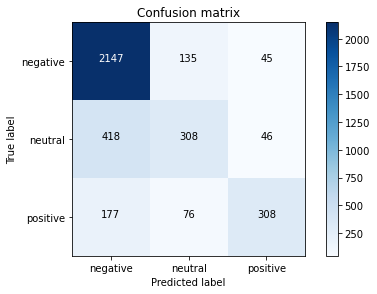

In [36]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])
plot_confusion_matrix(cm, classes=['negative', 'neutral', 'positive'])